In [155]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [157]:
Transactions_df = pd.read_csv('Transactions.csv')

In [159]:
Transactions_df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [161]:
Customers_df = pd.read_csv('Customers.csv')
Products_df = pd.read_csv('Products.csv')

In [163]:
Transactions_df.columns = Transactions_df.columns.str.strip().str.replace('ï»¿', '')

In [165]:
Customers_df['SignupDate'] = pd.to_datetime(Customers_df['SignupDate'])
Transactions_df['TransactionDate'] = pd.to_datetime(Transactions_df['TransactionDate'])

In [181]:
merged_df = Transactions_df.merge(Customers_df, on="CustomerID", how="left").merge(Products_df, on="ProductID", how="left")
merged_df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68


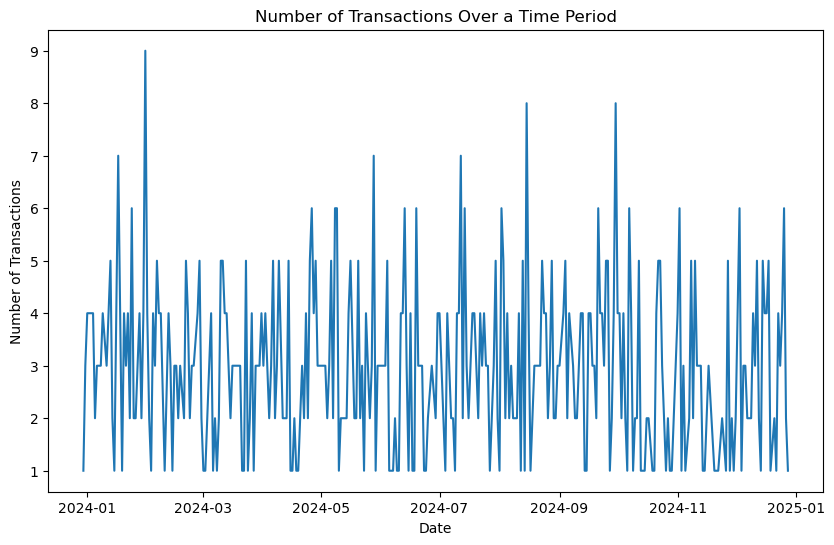

In [179]:
# 1. Transactions Over Time
plt.figure(figsize=(10, 6))
merged_df['TransactionDate'].dt.date.value_counts().sort_index().plot(kind='line')
plt.title("Number of Transactions Over a Time Period")
plt.xlabel("Date")
plt.ylabel("Number of Transactions")
plt.show()

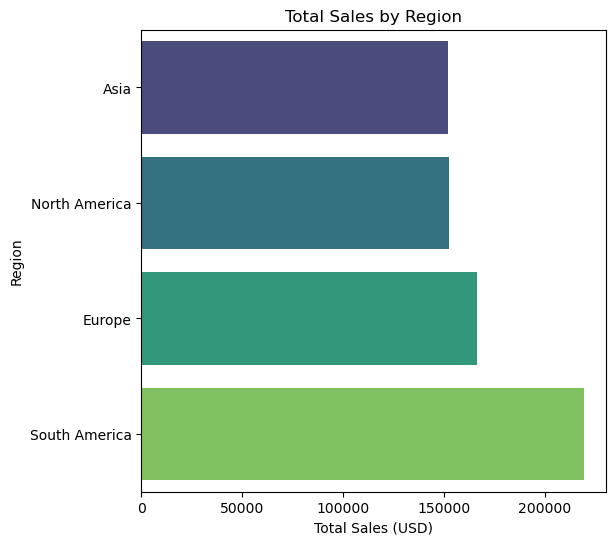

In [199]:
# 2. Top Regions by Total Sales
region_sales = merged_df.groupby('Region')['TotalValue'].sum().sort_values(ascending=True)
plt.figure(figsize=(6, 6))
sns.barplot(x=region_sales.values, y=region_sales.index, hue=region_sales.index, palette="viridis", legend=False)
plt.title("Total Sales by Region")
plt.xlabel("Total Sales (USD)")
plt.ylabel("Region")
plt.show()

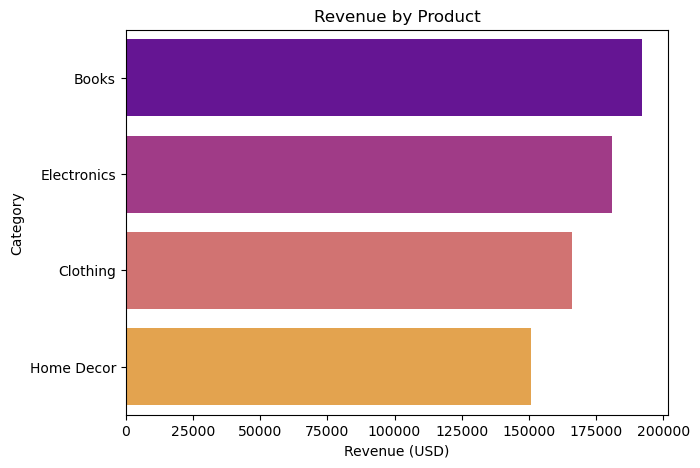

In [201]:
# 3. Revenue by Product Category
category_sales = merged_df.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
plt.figure(figsize=(7, 5))
sns.barplot(x=category_sales.values, y=category_sales.index, hue= category_sales.index, palette="plasma", legend = False)
plt.title("Revenue by Product")
plt.xlabel("Revenue (USD)")
plt.ylabel("Category")
plt.show()

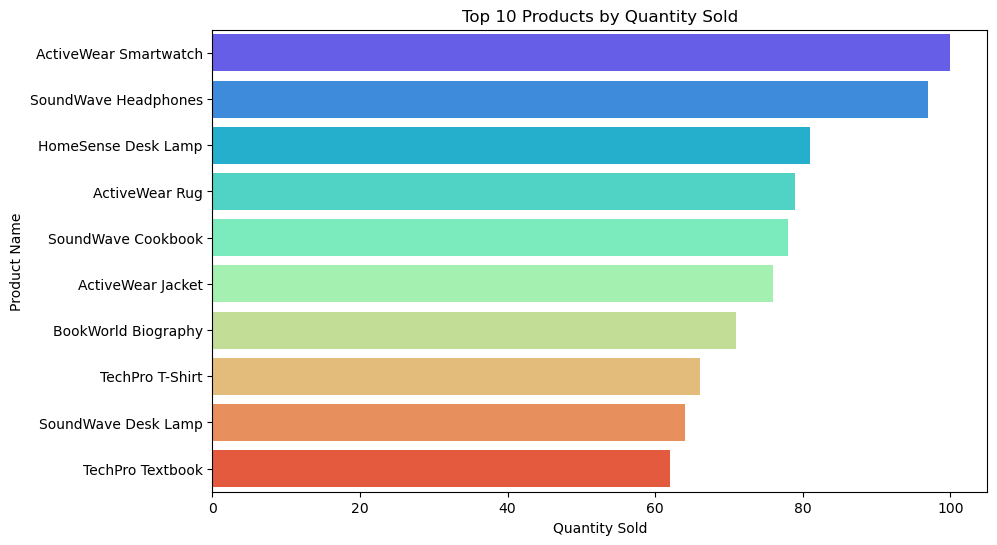

In [189]:
# 4. Top 10 products by quantity sold
top_products = merged_df.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.values, y=top_products.index, hue=top_products.index, palette="rainbow", legend=False)
plt.title("Top 10 Products by Quantity Sold")
plt.xlabel("Quantity Sold")
plt.ylabel("Product Name")
plt.show()

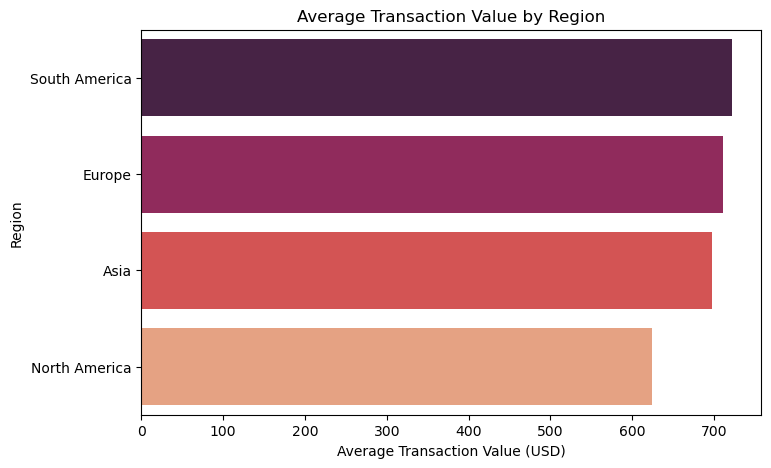

In [197]:
# 5. Average Transaction Value by Region
avg_transaction_value = merged_df.groupby('Region')['TotalValue'].mean().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(x=avg_transaction_value.values, y=avg_transaction_value.index, hue=avg_transaction_value.index, palette="rocket", legend=False)
plt.title("Average Transaction Value by Region")
plt.xlabel("Average Transaction Value (USD)")
plt.ylabel("Region")
plt.show()